# <center>Data Sourcing Techniques and Data Science Methods </center>
_Leveraging Data Science 2019 SIOP Master Tutorial_



Data science’s focus on extremely large datasets has led to the development of many tools and analytic approaches optimized for those datasets, and many of these tools and approaches bring great value to improve the conclusions developed
by IOs, even when data isn’t that big. 

Some of these concepts & tools are new to many people in IO but most are not as foreign as they appear initially. 

We’ll be discussing two general types of data science tools and approaches that have potential to help IOs better address old research questions or develop new research questions:

 1. New data sources to consider:
       * APIs and Webscraping


 2. Data Science Methods
       * Natural Language Processing
       * Machine Learning
       
Demo using SIOP-related Tweets:


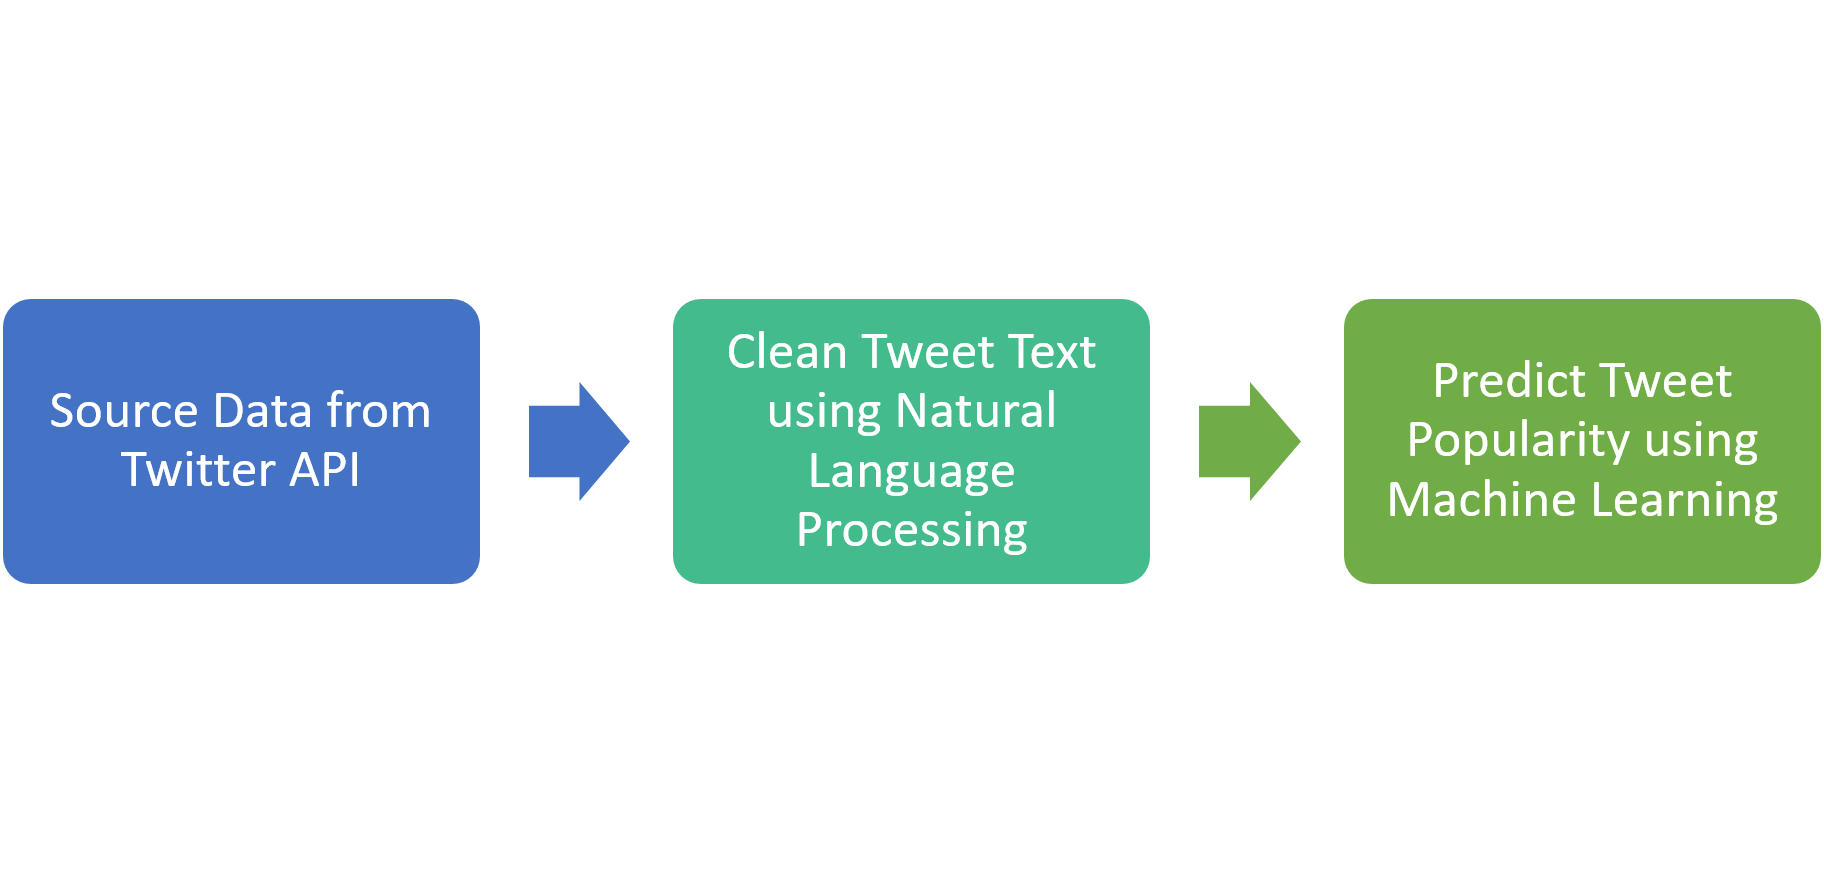

In [260]:
library("IRdisplay")
display_png(file="intropicture.png")

## New Data Sources (APIs & Webscraping)

### APIs and Webscraping

Two primary ways of systematically accessing information from the web:

**(Manual) Web Scraping: requires crawling webpages for HTML tags**
* generally used when an API is not available
* usually generates unstructured/messy output
* see https://rlanders.net/scrapy/ for step-by-step walk through

**Application Programming Interfaces (APIs): a gateway into a system created by a service provider**
* Almost universally intended and designed for real-time access by other websites, but you can use them too 
* Requires learning API documentation – they’re all different
* Most APIs require “keys” or “tokens” or “secret phrase”, etc


We'll demo a user-friendly way of accessing the Twitter API using R.

#### Accessing Twitter's API

First, let's load the libraries we'll need. 

In [213]:
library(rtweet)
library(dplyr)

Next we need to set up access to the Twitter API. The Twitter API will allow us to request data from Twitter to use later in our analyses. In order to obtain permission to access the Twitter API, you'll need to first set up credentials. 

To do this, you'll need to log into Twitter and create an application: https://developer.twitter.com/en/account/get-started. 

Once you have created an application, locate your "keys and tokens." We'll temporarily save these to our local R environment. Make sure you don't share these with others!

Add keys here:

In [214]:
# Replace these with your Twitter access keys (in the quote) - DO NOT SHARE YOUR KEYS WITH OTHERS
appname <- "SIOP Data Science Tutorial"
key <- ""
secret <- ""
access_token <- ""
access_secret <- ""
	
# Store these keys for the next step (just run this script)
twitter_token<- create_token(
  app = appname,
  consumer_key = key,
  consumer_secret = secret,
  access_token = access_token,
  access_secret =access_secret)


Now that we have our Twitter API credential set up, we can submit an API request. To do this we will use the R package **rtweet** (https://rtweet.info/). Using this package you can interact with Twitter's API by searching recent tweets by keywords, publishing tweets, getting trends, and even pulling entire timelines. For this demonstration, we'll be searching for tweets related to SIOP and IO psychology by searching for tweets that contain #SIOP, #IOPsych, #IamSIOP, #SIOP19. 

It's important to note that free access to Twitter's API restricts search capabilities to tweets that have occurred in the past 6-9 days. Twitter also limits search results to 18,000 tweets every 15 minutes. Paid tiers provide more access and options. 

Using the **rtweets::search_tweets()**  we'll specify our search parameters using the _q_ argument and the number of tweets using the _n_ argument. 


In [215]:
#request 
siop_tweets <- search_tweets(q = "#SIOP OR #IOPsych OR #IamSIOP OR #SIOP19",
                              n = 3000)

nrow(siop_tweets)
head(siop_tweets, n = 3)


Searching for tweets...
Finished collecting tweets!


[1] 2930

user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
1098791904030806017,1112015377700216833,2019-03-30 15:35:00,cordes_rj,"My godson is about to be born, going to a talk at the national press club in D.C., going to Toronto for a documentary screening, finally got my dog to respond to right &amp; left guard.This a good few weeks. #yearofthepig #documentary #SIOP19 #newnephew #thegodfather #variousHashtags",Twitter for Android,284,NA,NA,NA,...,23,105,2019-02-22 03:49:39,FALSE,https://t.co/aWTIPk12vz,https://cordes-rj.github.io/,en,NA,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1098792374589829121/nhXxUydi_normal.jpg
27337930,1112014707941171200,2019-03-30 15:32:21,JeffreyDahlke,"Holy cow! #dataviz done right! https://t.co/N7kZR1iN8J how can we use this, in #iopsych?",Twitter for iPhone,107,NA,NA,NA,...,318,829,2009-03-28 23:56:09,FALSE,https://t.co/WFWBZ2SGcc,https://jeffreydahlke.com/,en,https://pbs.twimg.com/profile_banners/27337930/1538063961,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/984600394230837249/choxwS0s_normal.jpg
27337930,1110187038618337280,2019-03-25 14:29:50,JeffreyDahlke,@JeffreyDahlke Is there a way to make this reality? A podcast that would be willing to do this? An #IOPsych program willing to change their syllabus and take a chance on this idea?,Twitter Web Client,140,NA,NA,NA,...,318,829,2009-03-28 23:56:09,FALSE,https://t.co/WFWBZ2SGcc,https://jeffreydahlke.com/,en,https://pbs.twimg.com/profile_banners/27337930/1538063961,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/984600394230837249/choxwS0s_normal.jpg
27337930,1110189913700515840,2019-03-25 14:41:16,JeffreyDahlke,"@bmwiernik Down for being a host? We could use #SIOP19 and the summer to rustle up some interested programs/students, then start up in the fall.",Twitter Web Client,133,1110189339273764864,126615639,bmwiernik,...,318,829,2009-03-28 23:56:09,FALSE,https://t.co/WFWBZ2SGcc,https://jeffreydahlke.com/,en,https://pbs.twimg.com/profile_banners/27337930/1538063961,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/984600394230837249/choxwS0s_normal.jpg
27337930,1110193644835913731,2019-03-25 14:56:05,JeffreyDahlke,"Let's fix academic posters! Prepping a poster for #SIOP19 and sick of the old ""wall-of-text"" poster design? Watch this cartoon to see a new, faster approach to designing research posters. Includes templates. #betterposter https://t.co/wyXhiP5CKl https://t.co/UBYB2GzIv9",Twitter Web Client,140,NA,NA,NA,...,318,829,2009-03-28 23:56:09,FALSE,https://t.co/WFWBZ2SGcc,https://jeffreydahlke.com/,en,https://pbs.twimg.com/profile_banners/27337930/1538063961,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/984600394230837249/choxwS0s_normal.jpg
27337930,1110183369231556608,2019-03-25 14:15:16,JeffreyDahlke,"Each semester, #IOPsych PhD students take seminars that require them to read deeply &amp; become experts on topic so they can present it to their colleagues. What if there were a podcast devoted to interviewing these folks about those topics? Like a spoken plain-language lit review.",Twitter Web Client,283,NA,NA,NA,...,318,829,2009-03-28 23:56:09,FALSE,https://t.co/WFWBZ2SGcc,https://jeffreydahlke.com/,en,https://pbs.twimg.com/profile_banners/27337930/1538063961,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/984600394230837249/choxwS0s_normal.jpg


In [216]:
#if we want to save our tweets, we can use the save_as_csv function
#save_as_csv(siop_tweets, "tweets.csv")
#write.csv doesn't work here because of the structure of the searh_tweets output

#for this demonstration, we'll just read in our saved tweets (These tweets were collected over the span of three weeks by running the above function once/week)
tweets <- read.csv("tweets.csv")
nrow(tweets) #we have about 4k SIOP-related tweets to work with


[1] 4349

Now we have some data! Let's glance at it:


In [261]:
tail(tweets, n = 3)

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
4104,x130658326,x1108111354190356480,3/19/2019 21:01,Taislq,"Calling all #iopsych folks on the applied job market: The Aldridge Group is #hiring! Looking for 1 or 2 folks to join the team. Cleveland or Denver areas a bonus, remote also works. Some travel required. Reach out if interested - happy to share details. #nowhiring @SIOPtweets https://t.co/PlzVfvzDTB",Twitter for iPhone,139,,,,...,2528,713,4/7/2010 23:09,FALSE,,,en,https://pbs.twimg.com/profile_banners/130658326/1552630702,http://abs.twimg.com/images/themes/theme4/bg.gif,http://pbs.twimg.com/profile_images/912592706794409984/9gX0S-5F_normal.jpg
4105,x838107058633310210,x1108099467419570177,3/19/2019 20:14,LeboSebete,AARP says IO psychology is the best second career for people over 40. I think it is the best career for people under 40 too! See the article #iopsych https://t.co/8uvl6B1w7C,Twitter for iPhone,140,,,,...,2744,11379,3/4/2017 19:21,FALSE,https://t.co/2FMT3011MB,http://Instagram.com/just_Lebo_13,en,https://pbs.twimg.com/profile_banners/838107058633310210/1508830450,,http://pbs.twimg.com/profile_images/1023327586754211840/TPzGtRR3_normal.jpg
4106,x362743713,x1108073879443030016,3/19/2019 18:32,anfmathgr6,Useful list. #SIOP #Ellchat_BkClub https://t.co/jDZheeBEJI,Twitter for iPhone,79,,,,...,362,525,8/26/2011 22:33,FALSE,https://t.co/asjK4A9144,http://middleschoolmysteries.blogspot.com,en,https://pbs.twimg.com/profile_banners/362743713/1498168208,http://abs.twimg.com/images/themes/theme10/bg.gif,http://pbs.twimg.com/profile_images/966806188397490176/bfsA_9zG_normal.jpg


This is pretty clean output but we'll still need to do some data cleaning depending on which parts of the data we're interested in. 

Additional things to consider
* all data sources have limitations
* psychometrics still matter
* privacy & ethics

## Data Science Methods (Natural Language Processing and Machine Learning)

Common characteristics of these approaches
* Not all that different from traditional approaches (e.g., OLS Regression, content coding)
* Tend to prioritize prediction over explanation

### Natural Language Processing (NLP)

NLP is the use of algorithms to create meaning from text data

The goal is to convert text into numbers in a meaningful way. But, there are an infinite number of ways to do this.

Common approaches:


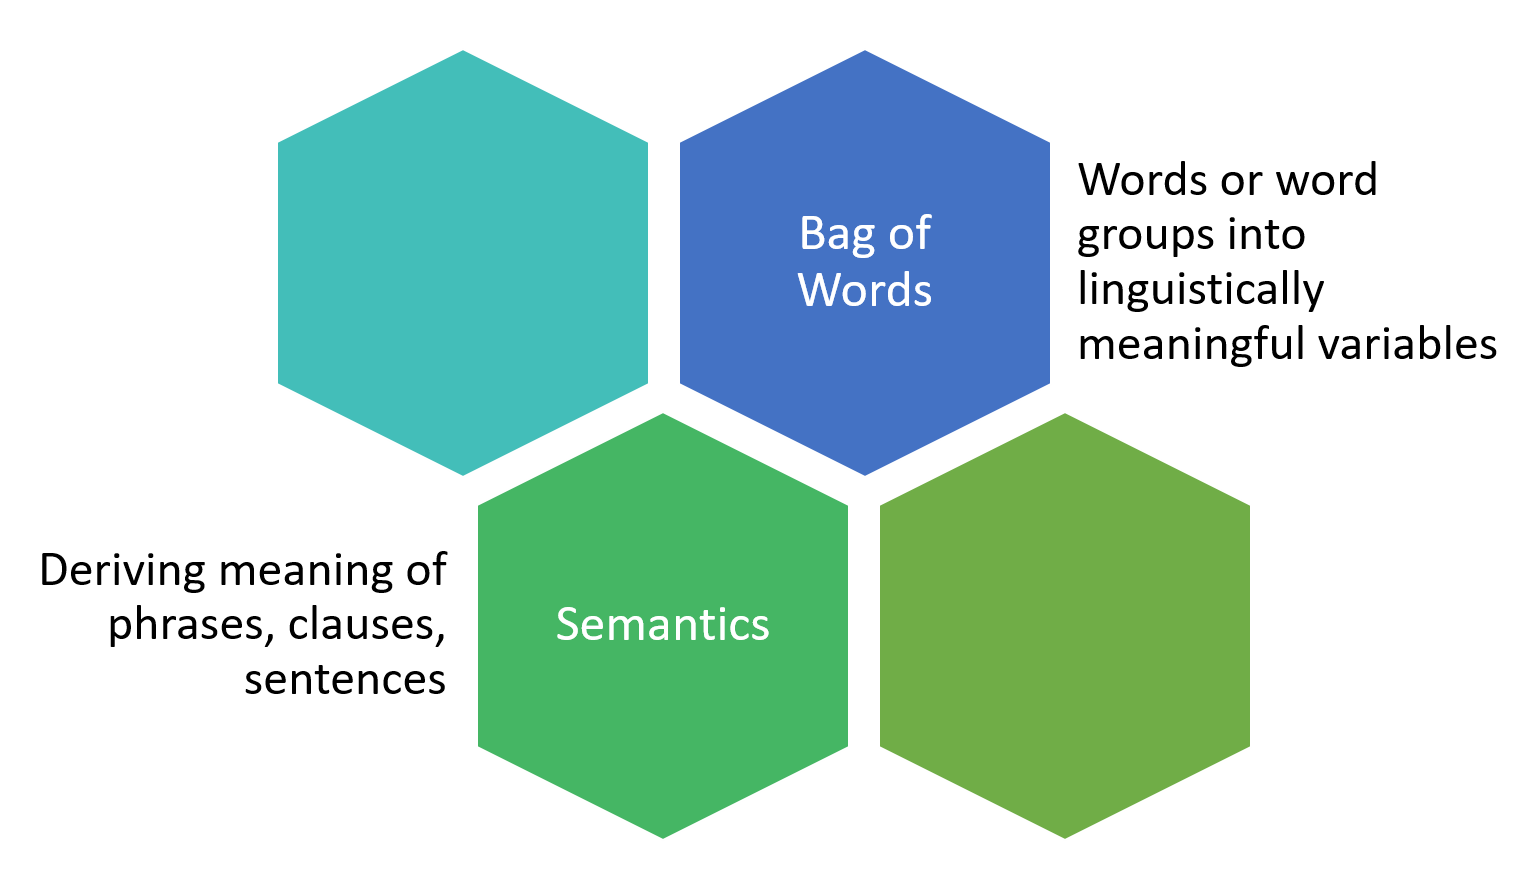

In [247]:
display_png(file="NLPpicture2.png")

General Steps:

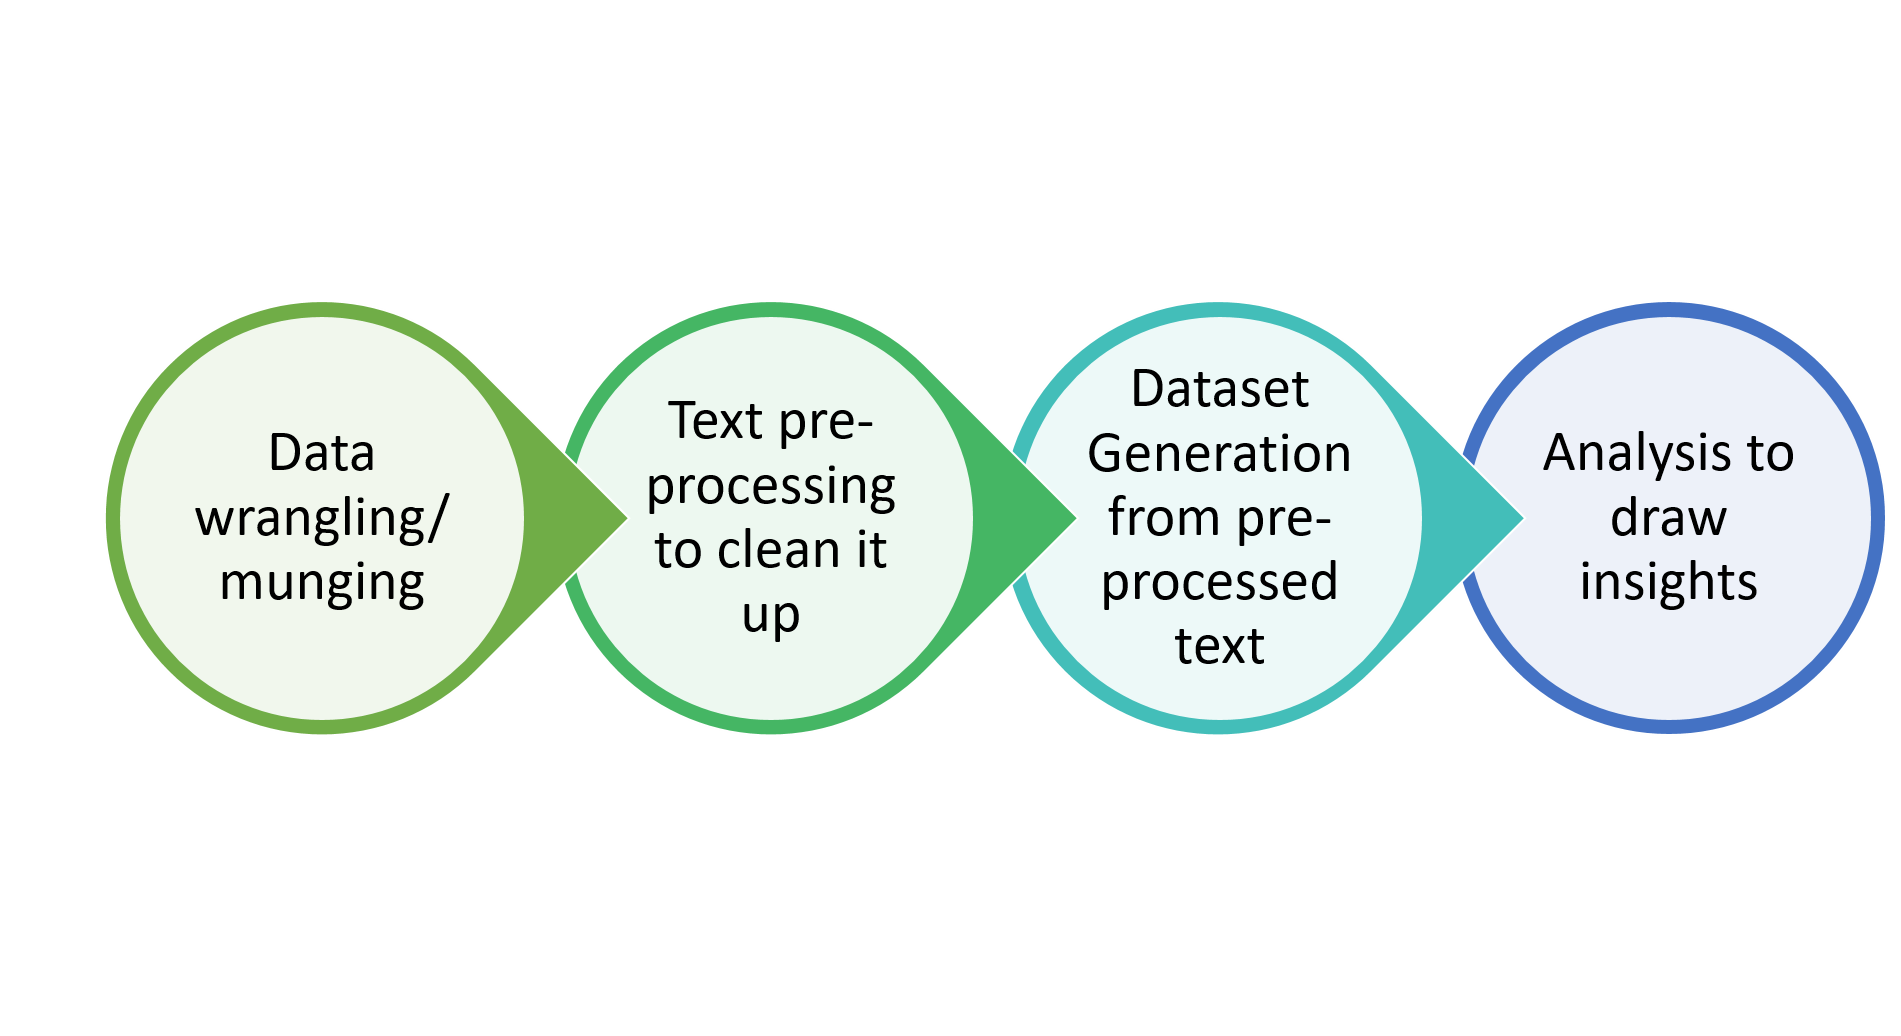

In [248]:
display_png(file="NLPpicture.png")

To demo, we'll clean up some of the tweet text and display common words in a word cloud.

Let's again load the R libraries we need

In [218]:
library(stringr)
library(tm)
library(wordcloud)

Let's first filter out some tweets that aren't useful to us (retweets and SIOP model-related tweets)

**note that only retweets without added text are removed, so we'll keep the ones with commentary


In [219]:
#First Let's specify that the tweet is in English & try to exclude some SIOPModel -related tweets
tweets <- tweets %>%
dplyr::filter(lang == "en") %>%
dplyr::filter( !grepl('siopmodel', text))%>%
dplyr::filter( !grepl('ellchat', text))

#let's also remove retweets
tweets_preprocessed <- tweets%>%
dplyr::filter(is_retweet == FALSE)


Here is the twitter text prior to pre-processing (a random sample of the dataset):

In [263]:
tweets_preprocessed %>%
mutate(text = as.character(text))%>%
select(text)%>%
sample_n(size = 5)

,text
480,im almost excited overheardatsiop return
484,members staff passionate work diverse interests caring members community share story us seenit learn
564,iopsychpodcasttip try new formats probably dont need another show like ones youre already listening debates cover movies perspective miniseries following particular study planning publication
317,pearsonprek12 ilit successmaker nabe2019 disneyworld convention blast sharing great ell newcomer resources
444,team development interventions evidencebased approaches improving teamwork collaboration teamwork teamtraining training learning


Now we need to do some preprocessing. We'll remove URLs, retweets, hashtags, mentions, special characters, punctuation, and stopwords. We'll also remove the search terms we used.

We'll also strip white space, and convert to lowercase. 

In [221]:
#preprocess tweet test
tweets_preprocessed$text <- lapply(tweets_preprocessed$text, function(x) {

  x = gsub('http\\S+\\s*', '', x) # Remove URLs
  x = gsub('[[:punct:]]', '', x) # Remove Punctuations
  x =  iconv(x,from="UTF-8",to="ASCII//TRANSLIT") # remove accents
  x = gsub('\\b+RT', '', x) # Remove RT
  x = gsub('#\\S+', '', x) # Remove Hashtags
  x = gsub('@\\S+', '', x) # Remove Mentions
  x = gsub('[[:cntrl:]]', '', x) # Remove Controls and special characters
  x = str_to_lower(x) # convert to lowercase
  x = removeWords(x, stopwords("en")) # remove stopwords
  x = removeWords(x, c("siop","iopsych","iamsiop","siop19")) # remove search terms
  x = removeWords(x, c("amp")) # remove "amp" associated with & and other words that are not meaningful in this context
  x = gsub(' +',' ',x) # Remove extra whitespaces
  
})


Let's re-examine the text after preprocessing. 

In [262]:
tweets_preprocessed %>%
mutate(text = as.character(text))%>%
select(text)%>%
sample_n(size = 5)


,text
308,deadline approaching submit proposals apas 2019 technology mind society conference psychology ai robotics vr ethics bigdata machinelearning healthcare humanfactors design learning education
602,drcraigrdawson hope drcraigrdawson im definitely disheartened progress lack thereof last decade continuously explain potential clients business colleagues research
151,masters consortium doctoral consortium includes impressive lineup speakers offer unique perspectives mc dc will held april 3 apply now masters doctoral teamsiop
254,mikezickar rboyatzis gagnemarylene howessatoris jfstn maybe activity twitter added qualification fellowship fellowship come
944,hugomunsterberg sioptweets sir follow example herr professor hugomunsterberg fans will find committee zone tables learn volunteering w sioptweets committee opportunities sioptweets siopecc


Now we need to create a corpus and convert our text into a document term matrix (rows are tweets, columns are n-grams)

In [223]:
tweets_corpus <- VCorpus(VectorSource(tweets_preprocessed$text))# Convert to corpus (structured set of texts)

tweets_dtm <- DocumentTermMatrix(tweets_corpus) #create a document-term-matrix

tweets_dtm <- removeSparseTerms(tweets_dtm, 0.99) # We'll also get rid of relatively unusual terms

DTM_df <- as.data.frame(as.matrix(tweets_dtm)) #finally let's convert the dtm into a dataframe

head(DTM_df)


2019,academic,also,analytics,annual,another,app,april,article,attend,...,washington,way,week,well,will,work,workplace,year,years,youll
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
0,0,0,0,0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now that our tweet text is clean, let's start to look the text a bit. We can visualize common words with a simple wordcloud.

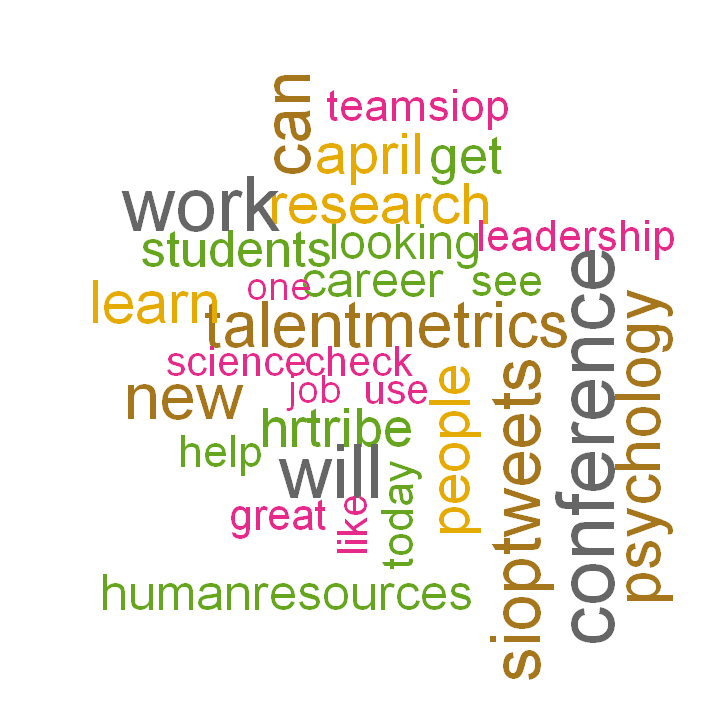

In [224]:
wordCounts <- colSums(DTM_df) #create word counts

wordNames <- names(DTM_df) #label word counts with word name

options(repr.plot.width=6, repr.plot.height=6) #resize word cloud

wordcloud(wordNames, wordCounts, max.words=30,, colors = brewer.pal(8, "Dark2")) #create word cloud

We can also look at the a list of the most frequent words

In [264]:
tibble(wordNames, wordCounts) %>% arrange(desc(wordCounts)) %>% top_n(15)

Selecting by wordCounts


wordNames,wordCounts
conference,93
work,88
will,86
sioptweets,78
can,74
new,72
talentmetrics,72
psychology,71
learn,67
people,63


### Machine Learning

A ML algorithm refers to a computer program that learns from data to generate predictions. Machine learning isn't all that different from our normal modeling approaches (think OLS linear regression), but machine learning typically has a different goal.

Traditionally, our **traditional analyses** are focused on _"given this theory, how well do the data describe y?"_ 
* The primary goal is interpretability of regression coefficients and ultimately draw conclusions about our predictors

In contrast, **machine learning** is focused on _"given this data, what algorithm and features will best predict y in other datasets?"_ 
* The primary goal is generalizable prediction, typically at the cost of  interpretability of coefficients. 
* Machine learning explicitly addresses the bias-variance trade-off, which optimizes model complexity such that we are not overfitting to one dataset but also so that we're maximizing prediction. 

There a few types of machine learning: 

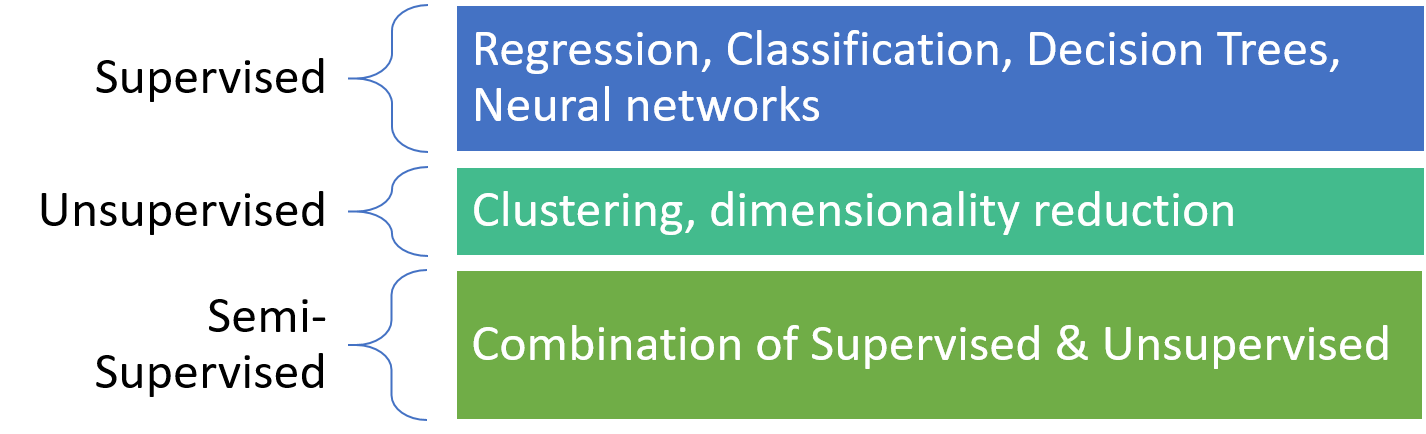

In [249]:
display_png(file="MLpicture.png")

There are also quite a few decision points:
* model selection (random forest, support vector machines, elastic net)
* parameter selection (variables and parameter estimation)
* hyperparameter selection (configuration options for each model) 

Typically you make these decision (or the algorithm does for you) empirically. In other words, many of these decisions are made based on out of sample model performance. 

Finally, there are a few key situations in which machine learning models are particularly useful (Putka, Beatty & Reeder, 2017):

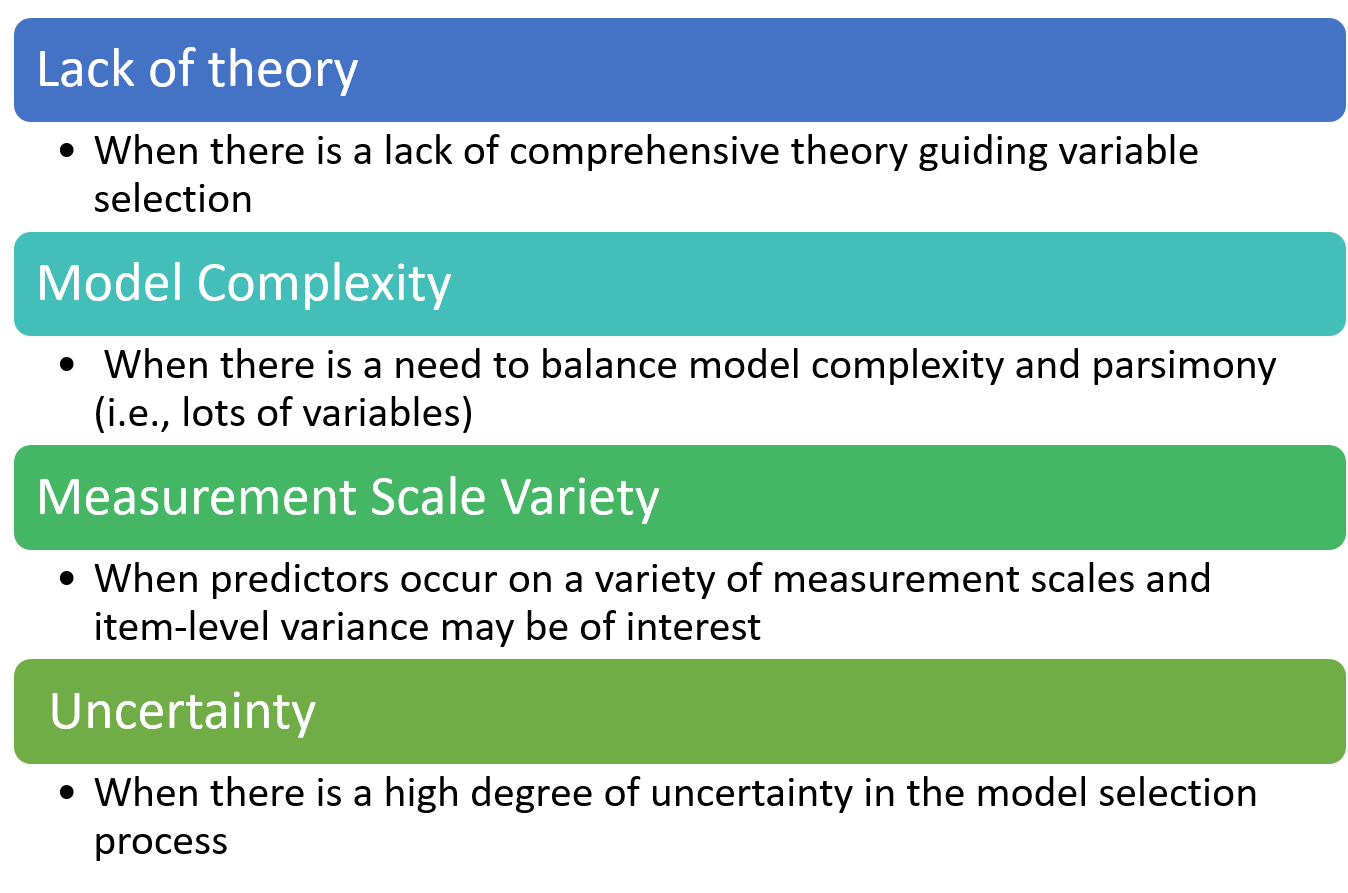

In [250]:
display_png(file="MLpicture2.png")

If you're interested in learning more about using machine learning in IO, I would recommend this paper:

Putka, D. J., Beatty, A. S., & Reeder, M. C. (2018). Modern prediction methods: New perspectives on a common problem. _Organizational Research Methods, 21_(3), 689-732.


Now back to our tweets. Say we want to predict retweets and favorite counts by the words used in a tweet.

Again, let's load our libraries

In [226]:
library(caret)
library(glmnet)
library(gbm)
library(kernlab)

We need to do a bit of data cleaning first.

We'll operationalize **"tweet popularity"** as a composite of favorites and likes per tweet. 

In [227]:
# create tweet popularity score
tweet_popularity <- mutate(tweets_preprocessed, tweet_popularity = favorite_count + retweet_count) %>%
select(tweet_popularity)

#add these scores to our document term matrix (our predictors)
model_data <- cbind(DTM_df, tweet_popularity)

#also add in tweet ID number so that we have an ID
model_data$ID <- seq.int(nrow(model_data))

#move ID and tweet popularity to front of dataset (for easy accessiblity)
model_data <- select(model_data, ID, tweet_popularity, everything())
head(model_data)


ID,tweet_popularity,2019,academic,also,analytics,annual,another,app,april,...,washington,way,week,well,will,work,workplace,year,years,youll
1,106,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,105,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,98,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,87,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,92,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,78,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We'll be using the Caret R Package (https://topepo.github.io/caret/)
* Caret actually does contain any machine learning algorithms
* Caret provides a common framework/syntax to access many other packages that do contain machine learning algorithms
* Caret centralizes tuning of hyperparameters across algorithms
* Caret allows you to run multiple machine learning algorithms using the same framework


We'll first set a seed for reproducibility of our results. There are a lot of "random" parameters so you might try a few seed and make sure your results don't change dramatically. 

We'll also set up a set up a training and a test set. Here we're using an 80/20 split. Our models will be trained on 80% of the data and we will test our model on 20% of the data. This will give us an estimate of how well our models perform out-of-sample.

In addition, we'll set up a k-fold cross validation training the model on the training set. The data is divided into k sub datasets (in our case, 5). Each k-fold is used as a holdout sample and model performance is then averaged across all folds. This helps with over and underfitting to the training set.

In [228]:
#set seed for reproducibility
set.seed(167)

# let's create a holdout dataset
index <- createDataPartition(model_data$ID, p=0.80, list=FALSE)
training_df <- model_data[index,]
test_df <- model_data[-index,]

# create Kfold index
index <- createFolds(training_df$ID, k=5)

#clean up our final datasets
training_df<-training_df[-1] #remove id var
test_df<-test_df[-1] # remove id var

Next, we need to decide which models to use. There are a ton (see https://topepo.github.io/caret/available-models.html for a list).

For this demonstration we'll use three:

* Elastic Net (glmnet)
* Stochastic Gradient Boosting (gbm)
* Support Vector Machines with Linear Kernel (svmLinear)


Here are a few "gentle introduction" resources for understanding each:

Elastic Net: https://towardsdatascience.com/regression-analysis-lasso-ridge-and-elastic-net-9e65dc61d6d3

Stochastic Gradient Boosting: https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab

Support Vector Machines: https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

In [229]:
# let's set up vectors of algorithms to look at
algo_vec <- c("glmnet", "gbm", "svmLinear")

Now we can use Caret to run each of the algorithms on our data. This function creates a results data frame that includes each of the models we specified above as well as the out-of-sample validity (the correlation between the predicted tweet popularity scores and the actual tweet popularity scores). Once you run this, you should get a bunch of output that will show you each step of the training process for each model.

In [233]:
# iterate through analyses and create each model, also validate versus test set
#set seed for reproducibility
set.seed(85)

results_df <- data_frame(model=as.character(), validity=as.numeric())
models <- list()
for (j in 1:length(algo_vec)) {
    resultName <- paste0("JP","-",algo_vec[j])
    models[[resultName]] <- train(  
      tweet_popularity ~ .,
      tuneLength=5,
      data=training_df,
      method=algo_vec[j],
      preProcess=c("zv"),
      trControl=trainControl(method="cv", number=5, verboseIter=T, index=index)
    )
        
    results_df <- bind_rows(results_df, data_frame(
      model=resultName,
      validity=cor(predict(models[[resultName]], test_df), pull(test_df, tweet_popularity))
    ))
    
  }


+ Fold1: alpha=0.100, lambda=39.8 
- Fold1: alpha=0.100, lambda=39.8 
+ Fold1: alpha=0.325, lambda=39.8 
- Fold1: alpha=0.325, lambda=39.8 
+ Fold1: alpha=0.550, lambda=39.8 
- Fold1: alpha=0.550, lambda=39.8 
+ Fold1: alpha=0.775, lambda=39.8 
- Fold1: alpha=0.775, lambda=39.8 
+ Fold1: alpha=1.000, lambda=39.8 
- Fold1: alpha=1.000, lambda=39.8 
+ Fold2: alpha=0.100, lambda=39.8 
- Fold2: alpha=0.100, lambda=39.8 
+ Fold2: alpha=0.325, lambda=39.8 
- Fold2: alpha=0.325, lambda=39.8 
+ Fold2: alpha=0.550, lambda=39.8 
- Fold2: alpha=0.550, lambda=39.8 
+ Fold2: alpha=0.775, lambda=39.8 
- Fold2: alpha=0.775, lambda=39.8 
+ Fold2: alpha=1.000, lambda=39.8 
- Fold2: alpha=1.000, lambda=39.8 
+ Fold3: alpha=0.100, lambda=39.8 
- Fold3: alpha=0.100, lambda=39.8 
+ Fold3: alpha=0.325, lambda=39.8 
- Fold3: alpha=0.325, lambda=39.8 
+ Fold3: alpha=0.550, lambda=39.8 
- Fold3: alpha=0.550, lambda=39.8 
+ Fold3: alpha=0.775, lambda=39.8 
- Fold3: alpha=0.775, lambda=39.8 
+ Fold3: alpha=1.000

Now that we've trained our models, we can look at the results!

In [234]:
#examine results
results_df

model,validity
JP-glmnet,0.1890466
JP-gbm,0.2658123
JP-svmLinear,0.1456513


These validity values are the correlation between predicted tweet popularity scores from each of these algorithms and the actual tweet popularity scores in the holdout data.

Also remember that these numbers are likely to change based on the original validation splits. If you change your seed, these numbers will change (although, usually slightly). 

Finally, we'll want to unpack what variables (words) were most useful in each of these models. We can do this using Caret's **varImp()** function, which calculates variable importance depending on the model. See https://topepo.github.io/caret/variable-importance.html for more detials. 

In [232]:
#examine top 20 vars/model
options(scipen=999) #disable scientific notation for better interpretability
lapply(models, varImp)

$`JP-glmnet`
glmnet variable importance

  only 20 most important variables shown (out of 203)

                    Overall
interested      100.0000000
language         94.5108672
hugomunsterberg  88.2406644
booth            84.2908801
poster           61.0261101
love             36.5066758
employee         32.5961372
forward          21.6006120
talentmetrics    18.3413106
teamsiop         12.4631258
sessions          6.9233307
change            6.6213294
humanresources    5.8304336
orgdev            2.3807507
make              1.5452042
today             0.9607775
week              0.0977765
business          0.0811024
awesome           0.0004248
employees         0.0000000

$`JP-gbm`
gbm variable importance

  only 20 most important variables shown (out of 203)

              Overall
make           100.00
sioptweets      98.83
week            83.06
booth           72.66
language        66.00
excited         63.70
looking         58.97
just            57.45
team            56.60
can  

We can see that many of these rankings changed depending on the modeling approach. This is one reason why interpretation becomes more difficult. It's also not clear _why_ some of these words were more predictive than others, just that they were. However, it is undeniable that tweeting about Hugo Munsterberg directly causes tweet popularity! 


Some final considerations:
* Data does not have to be “big” to benefit from these approaches
* Interpretation still matters
* These techniques are far from perfect
